<a href="https://colab.research.google.com/github/rayen3060/Keypad/blob/master/BruitImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Saving lion.jpg to lion (5).jpg


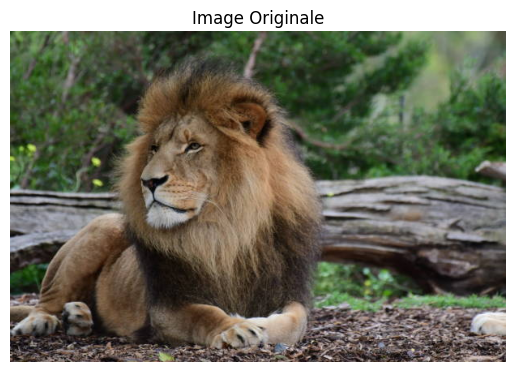

In [135]:
# Charger l'image
uploaded = files.upload()  # Téléchargez votre image ici
image_path = list(uploaded.keys())[0]
image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Afficher l'image originale
plt.imshow(image_rgb)
plt.title("Image Originale")
plt.axis('off')
plt.show()

L'image originale est affichée avec ses couleurs et détails intacts. Les pixels sont bien définis, sans perturbation ou artefacts.

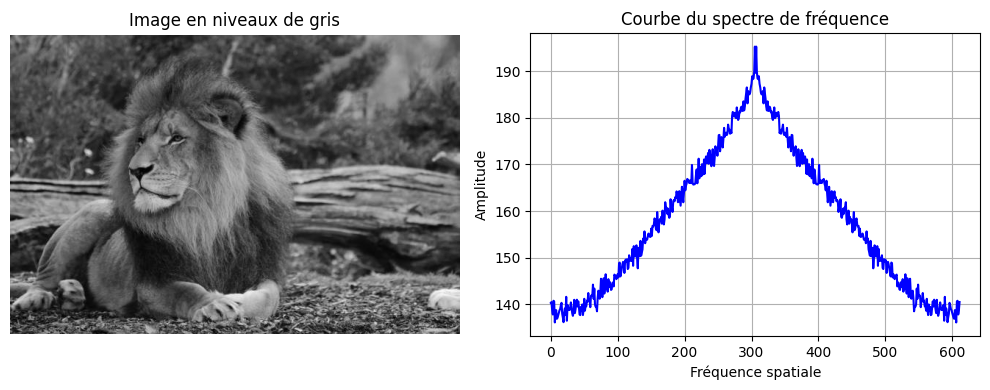

In [136]:
# Convertir en niveaux de gris
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Appliquer la Transformation de Fourier 2D
f_transform_o = np.fft.fft2(image_gray)
f_shift_o = np.fft.fftshift(f_transform_o)  # Décaler les basses fréquences au centre
magnitude_spectrum_o = 20 * np.log(np.abs(f_shift_o))  # Calculer le spectre d'amplitude

# Moyenne des fréquences sur toutes les lignes pour obtenir une courbe
frequency_profile_o = np.mean(magnitude_spectrum_o, axis=0)

# Afficher l'image originale et la courbe DSP
plt.figure(figsize=(10, 4))

# Image originale
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Image en niveaux de gris")
plt.axis('off')

# Courbe DSP
plt.subplot(1, 2, 2)
plt.plot(frequency_profile_o, color='blue')
plt.title("Courbe du spectre de fréquence")
plt.xlabel("Fréquence spatiale")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

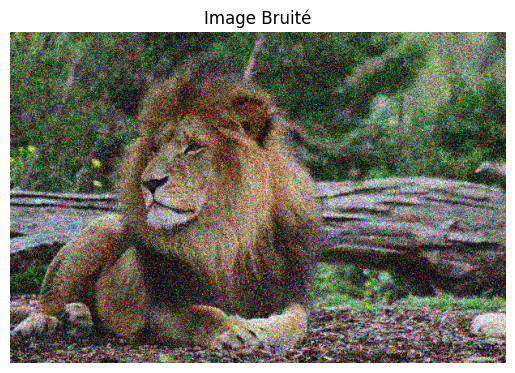

In [137]:
def Bruit_Gaussien(image, mean, sigma):
  #Application du bruit gaussien
  gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
  noisy_image = image.astype(np.float32) + gaussian_noise
  # Les valeurs doivent rester dans l'intervalle  [0, 255]
  noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
  return noisy_image

noisy_image=Bruit_Gaussien(image_rgb, mean=0, sigma=50)
plt.imshow(noisy_image)
plt.title("Image Bruité")
plt.axis('off')
plt.show()

En observant l'image bruitée, on observe des petits points lumineux et sombres un peu partout. Ces points rendent l'image moins nette et un peu floue.

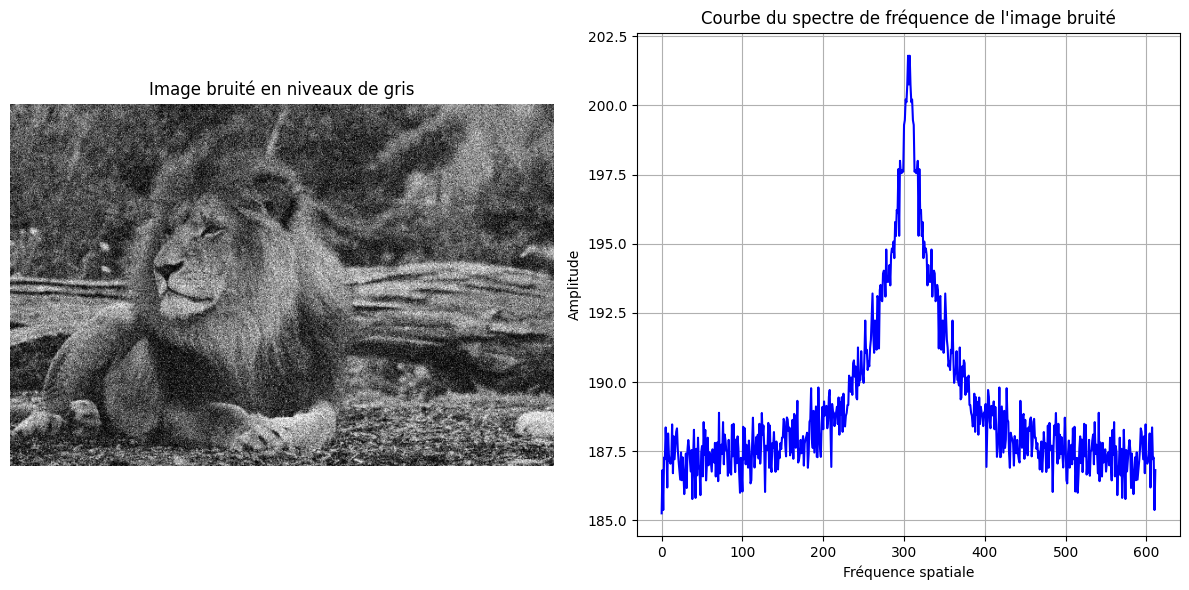

In [138]:
# Convertir en niveaux de gris
noisy_image_gray = cv2.cvtColor(noisy_image, cv2.COLOR_RGB2GRAY)

# Appliquer la Transformation de Fourier 2D
f_transform_b = np.fft.fft2(noisy_image_gray)
f_shift_b = np.fft.fftshift(f_transform_b)  # Décaler les basses fréquences au centre
magnitude_spectrum_b = 20 * np.log(np.abs(f_shift_b))  # Calculer le spectre d'amplitude

# Moyenne des fréquences sur toutes les lignes pour obtenir une courbe
frequency_profile_b = np.mean(magnitude_spectrum_b, axis=0)

# Afficher l'image originale et la courbe DSP
plt.figure(figsize=(12, 6))

# Image originale
plt.subplot(1, 2, 1)
plt.imshow(noisy_image_gray, cmap='gray')
plt.title("Image bruité en niveaux de gris")
plt.axis('off')

# Courbe DSP
plt.subplot(1, 2, 2)
plt.plot(frequency_profile_b, color='blue')
plt.title("Courbe du spectre de fréquence de l'image bruité")
plt.xlabel("Fréquence spatiale")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

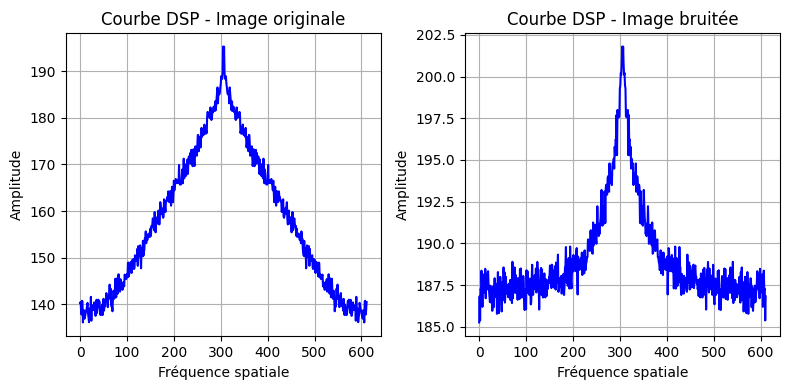

In [139]:
# Afficher les deux courbes DSP
plt.figure(figsize=(8, 4))

# Courbe DSP de l'image originale
plt.subplot(1, 2, 1)
plt.plot(frequency_profile_o, color='blue', label="Image originale")
plt.title("Courbe DSP - Image originale")
plt.xlabel("Fréquence spatiale")
plt.ylabel("Amplitude")
plt.grid()


# Courbe DSP de l'image bruitée
plt.subplot(1, 2, 2)
plt.plot(frequency_profile_b, color='blue', label="Image bruitée")
plt.title("Courbe DSP - Image bruitée")
plt.xlabel("Fréquence spatiale")
plt.ylabel("Amplitude")
plt.grid()


plt.tight_layout()
plt.show()

 **Image bruitée :** L'ajout de bruit gaussien crée une texture granuleuse sur l'image, simulant des imperfections ou un bruit électronique.

**Spectre DSP :** La courbe DSP montre comment l'énergie est répartie dans les fréquences:

*   Si l'image est lisse, l'énergie est concentrée dans les basses fréquences (pic au début de la courbe).
*   Si l'image a beaucoup de détails ou du bruit, les hautes fréquences sont également présentes (énergie plus dispersée).

Lors de cette étude, nous avons analysé l'impact du bruit gaussien sur une image en comparant ses propriétés fréquentielles avant et après l'ajout de bruit. La transformation de Fourier a permis de visualiser la répartition des fréquences spatiales. Pour l'image originale, les basses fréquences, représentant les détails globaux, dominent. En revanche, l'image bruitée montre une augmentation notable des hautes fréquences, causée par les variations rapides introduites par le bruit. Cela se reflète dans les courbes DSP, où l'image bruitée présente une courbe plus plate, indiquant une répartition plus uniforme de l'énergie. Ces observations confirment que le bruit affecte principalement les hautes fréquences, rendant les détails moins discernables.

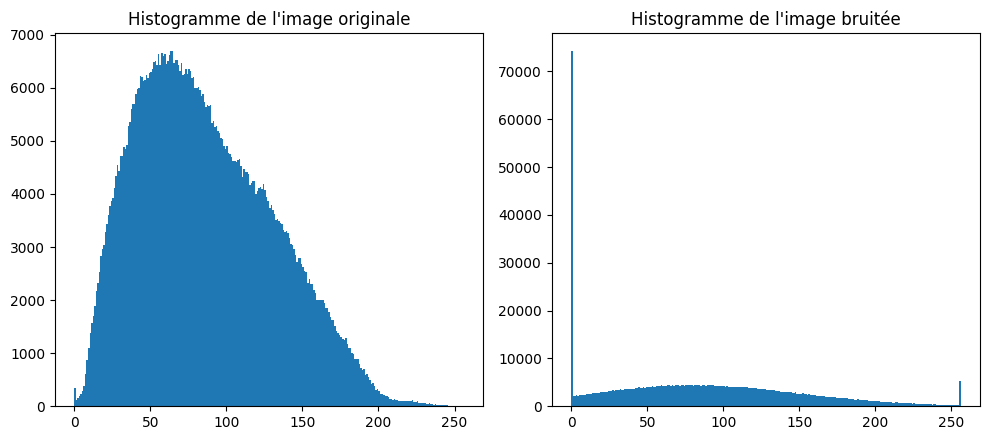

In [140]:
# Afficher les histogrammes
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

# Histogramme de l'image originale
axes[0].hist(image_rgb.ravel(), bins=256, range=[0, 256])
axes[0].set_title("Histogramme de l'image originale")

# Histogramme de l'image bruitée
axes[1].hist(noisy_image.ravel(), bins=256, range=[0, 256])
axes[1].set_title("Histogramme de l'image bruitée")

plt.tight_layout()
plt.show()


Histogramme de l'image originale :

*   Il représente la distribution des intensités des pixels dans l'image.
*   Les pics dans l'histogramme indiquent les plages d'intensité les plus fréquentes pour les canaux R, G et B.
*   Un histogramme bien défini suggère que l'image a un bon contraste.


Histogramme de l'image bruitée :
* le bruit Gaussien rend la distribution des pixels plus dispersée, affectant le contraste et la clarté de l'image.
*  Les valeurs des pixels sont réparties sur une gamme plus large à cause du bruit ajouté.
*   Les pics présents dans l'image originale sont moins marqués ou lissés, car le bruit ajoute des variations autour des valeurs d'intensité d'origine.

Cela reflète une perte de structure dans les données d'intensité des pixels.

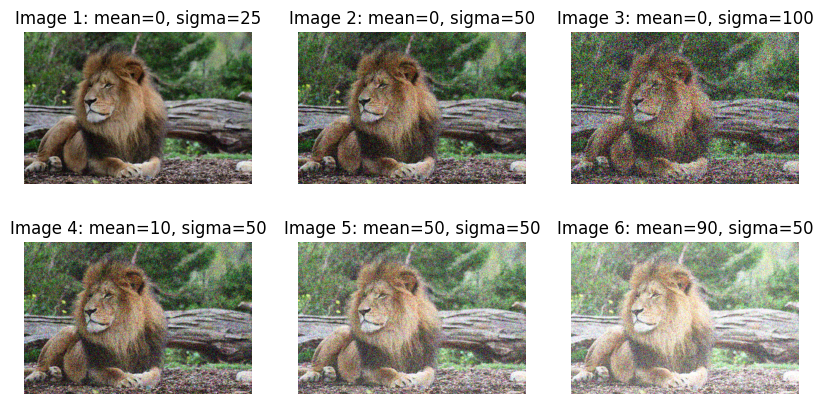

In [141]:

noisy_images = []

# Application du bruit Gaussien avec différents paramètres (moyenne et écart-type)
noisy_images.append(Bruit_Gaussien(image_rgb, mean=0, sigma=25))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=0, sigma=50))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=0, sigma=100))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=10, sigma=50))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=50, sigma=50))
noisy_images.append(Bruit_Gaussien(image_rgb, mean=90, sigma=50))

# Affichage des images bruitées avec différents paramètres
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(noisy_images[i])
    ax.set_title(f"Image {i+1}: mean={0 if i < 3 else 40*i-110}, sigma={25 if i==0 else 100 if i==2 else 50}")
    ax.axis("off")

plt.show()

Les images bruitées montrent des variations aléatoires introduites par le bruit Gaussien. Ces variations :

*   Peuvent rendre certains détails flous ou masqués.
*   Donnent un aspect granuleux à l'image.

L'ajout de bruit gaussien à une image réduit sa clarté visuelle. Avec un sigma faible, le bruit est léger et rend l'image un peu floue, mais avec un sigma élevé, l'image devient très altérée, comme un grésillement, rendant les détails difficiles à voir. Si la moyenne augmente, le bruit se déplace vers des valeurs plus élevées, accentuant les imperfections. En bref, plus le bruit est fort, plus l'image est dégradée et difficile à analyser.

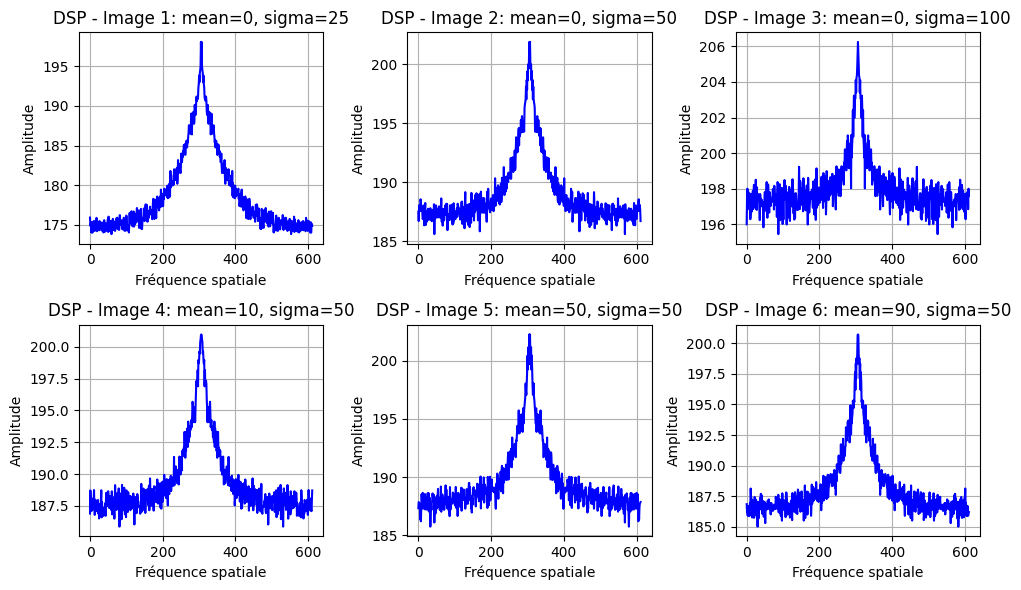

In [142]:
# Calcul du DSP pour chaque image bruitée
dsp_profiles = []
for noisy_image in noisy_images:
    noisy_image_gray = cv2.cvtColor(noisy_image, cv2.COLOR_RGB2GRAY)
    f_transform = np.fft.fft2(noisy_image_gray)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))
    frequency_profile = np.mean(magnitude_spectrum, axis=0)
    dsp_profiles.append(frequency_profile)

# Affichage des DSP
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.plot(dsp_profiles[i], color='blue')
    ax.set_title(f"DSP - Image {i+1}: mean={0 if i < 3 else 40*i-110}, sigma={25 if i==0 else 100 if i==2 else 50}")
    #ax.set_title(f"DSP - Image {i+1}")
    ax.set_xlabel("Fréquence spatiale")
    ax.set_ylabel("Amplitude")
    ax.grid()

plt.tight_layout()
plt.show()

Ce code réalise une analyse de Fourier pour extraire les courbes DSP (Spectre de Puissance de la Distribution Fréquentielle) des images bruitées. Pour chaque image, un spectre de fréquence est calculé après conversion en niveaux de gris. Ce spectre est ensuite moyenné sur les lignes pour générer une courbe représentative. Ces courbes DSP sont affichées sur une seule figure, avec six sous-graphes correspondant à six images bruitées. Chaque courbe reflète l'impact des paramètres du bruit gaussien (moyenne et écart-type) sur la distribution des fréquences. Les variations dans les courbes montrent clairement que l'ajout de bruit augmente l'énergie des hautes fréquences, ce qui est typique des variations rapides introduites par le bruit. Cette visualisation est utile pour comprendre comment le bruit altère les propriétés fréquentielles d'une image et peut guider le choix de filtres pour atténuer ses effets.

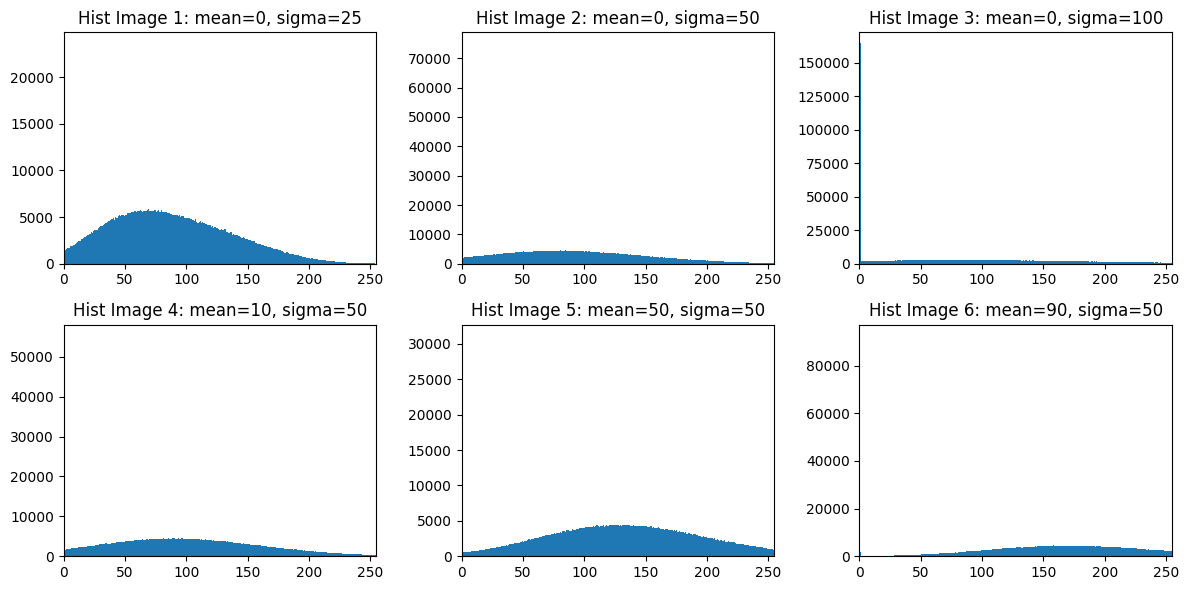

In [143]:
# Affichage les histogrammes pour chaque image
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # Afficher l'histogramme de l'image
    ax.hist(noisy_images[i].ravel(), bins=256, range=[0, 256])
    ax.set_title(f"Hist Image {i+1}: mean={0 if i < 3 else 40*i-110}, sigma={25 if i==0 else 100 if i==2 else 50}")
    ax.set_xlim(0, 255)

plt.tight_layout()
plt.show()

Les histogrammes des images bruitées montrent comment les variations des paramètres de bruit (moyenne et sigma) influencent la distribution des intensités. Avec une moyenne de 0 et un sigma croissant (25 à 100), la dispersion des pixels augmente, rendant l'image plus bruitée. Lorsque la moyenne est augmentée (10 ou 90), l'histogramme se décale vers des intensités plus élevées, reflétant un éclaircissement global. Ces résultats illustrent comment les paramètres du bruit Gaussien affectent à la fois la répartition des intensités et la qualité visuelle des images.

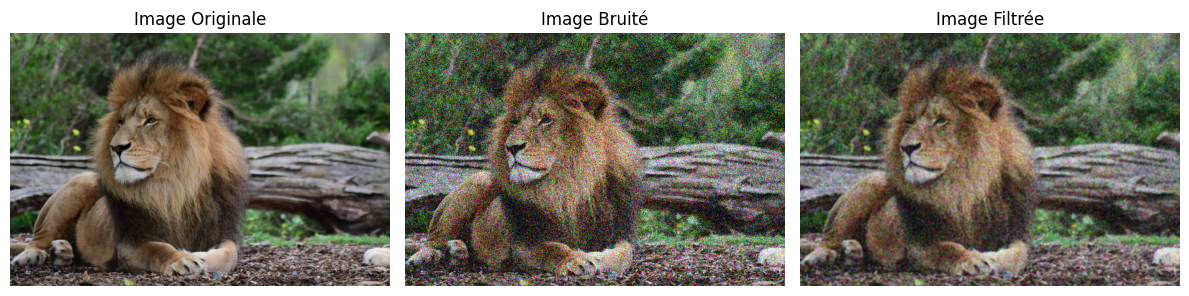

In [144]:
sigma=50
taille_noyau=(3,3)
noisy_image=Bruit_Gaussien(image_rgb, mean=0, sigma=50)
image_filtrée = cv2.GaussianBlur(noisy_image, taille_noyau, sigma)

# Créer un subplot avec 1 ligne et 3 colonnes
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Afficher l'image originale
axes[0].imshow(image_rgb)
axes[0].set_title("Image Originale")
axes[0].axis('off')

# Afficher l'image bruitée
axes[1].imshow(noisy_image)
axes[1].set_title("Image Bruité")
axes[1].axis('off')

# Afficher l'image filtrée
axes[2].imshow(image_filtrée)
axes[2].set_title("Image Filtrée")
axes[2].axis('off')

# Ajuster les espacements
plt.tight_layout()

# Afficher le graphique
plt.show()




L'image originale est nette et claire, sans aucune perturbation. L'ajout du bruit Gaussien avec un sigma=50 a introduit un effet granuleux sur l'image, créant des variations aléatoires d'intensité des pixels, ce qui rend l'image floue et perturbée. En appliquant un filtre Gaussien avec un noyau de taille (3, 3) à l'image bruitée, on remarque un lissage qui réduit considérablement l'effet du bruit, mais cela entraîne également une perte de détails fins. Le filtre Gaussien a donc permis d'améliorer la lisibilité de l'image en supprimant une partie du bruit, mais au prix d'une certaine douceur. Ce processus montre comment un filtrage peut atténuer le bruit tout en modifiant les contours et détails de l'image.

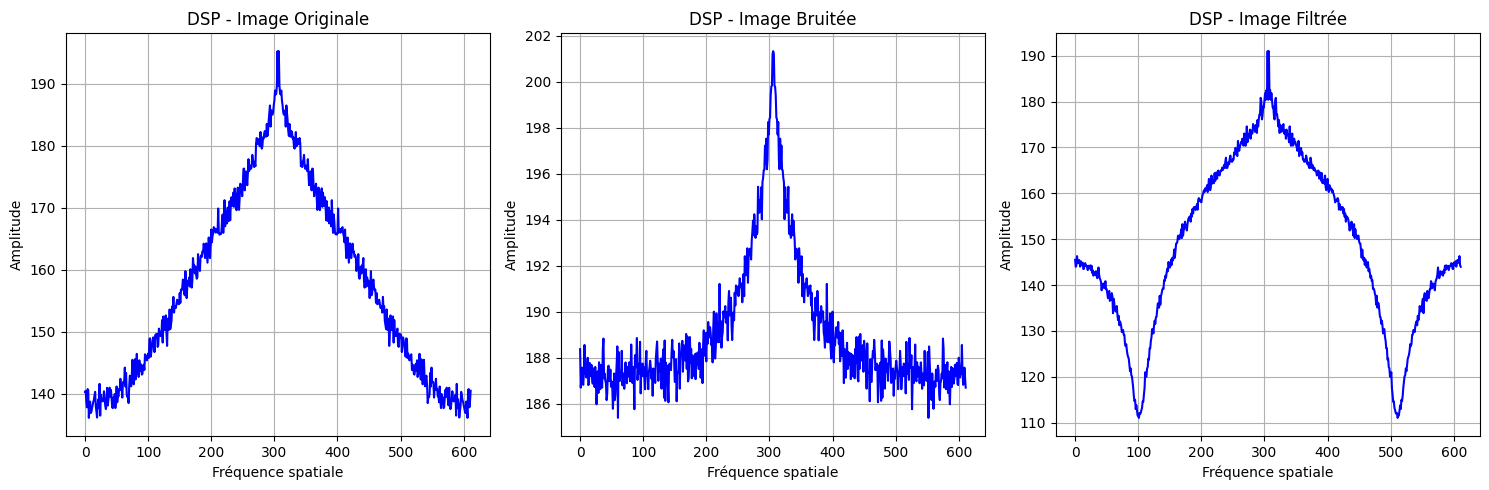

In [145]:
# Calcul des DSP pour chaque image (originale, bruitée, filtrée)
images = [image_rgb, noisy_image, image_filtrée]
dsp_profiles = []

for img in images:
    # Convertir en niveaux de gris
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Appliquer la Transformation de Fourier 2D
    f_transform = np.fft.fft2(gray_image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))

    # Calculer le profil de fréquence
    frequency_profile = np.mean(magnitude_spectrum, axis=0)
    dsp_profiles.append(frequency_profile)

# Affichage des DSP sur une seule figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

titles = ["DSP - Image Originale", "DSP - Image Bruitée", "DSP - Image Filtrée"]

for i, ax in enumerate(axes):
    ax.plot(dsp_profiles[i], color='blue')
    ax.set_title(titles[i])
    ax.set_xlabel("Fréquence spatiale")
    ax.set_ylabel("Amplitude")
    ax.grid()

plt.tight_layout()
plt.show()


Les résultats obtenus permettent d’analyser l’effet du bruit et du filtrage sur les fréquences spatiales de l’image. La courbe DSP de l'image originale montre une forte concentration de l'énergie dans les basses fréquences, correspondant à une image claire et sans perturbations majeures. Après l'ajout de bruit, la courbe DSP de l'image bruitée affiche une augmentation significative des hautes fréquences, causée par les variations rapides et aléatoires introduites par le bruit gaussien. Enfin, la courbe DSP de l'image filtrée met en évidence l'effet du filtrage gaussien, qui atténue efficacement les hautes fréquences (associées au bruit) tout en préservant les basses fréquences (essentielles pour la structure globale de l'image). Cette comparaison montre l’efficacité du filtre à réduire l’impact du bruit tout en maintenant une qualité acceptable de l’image.





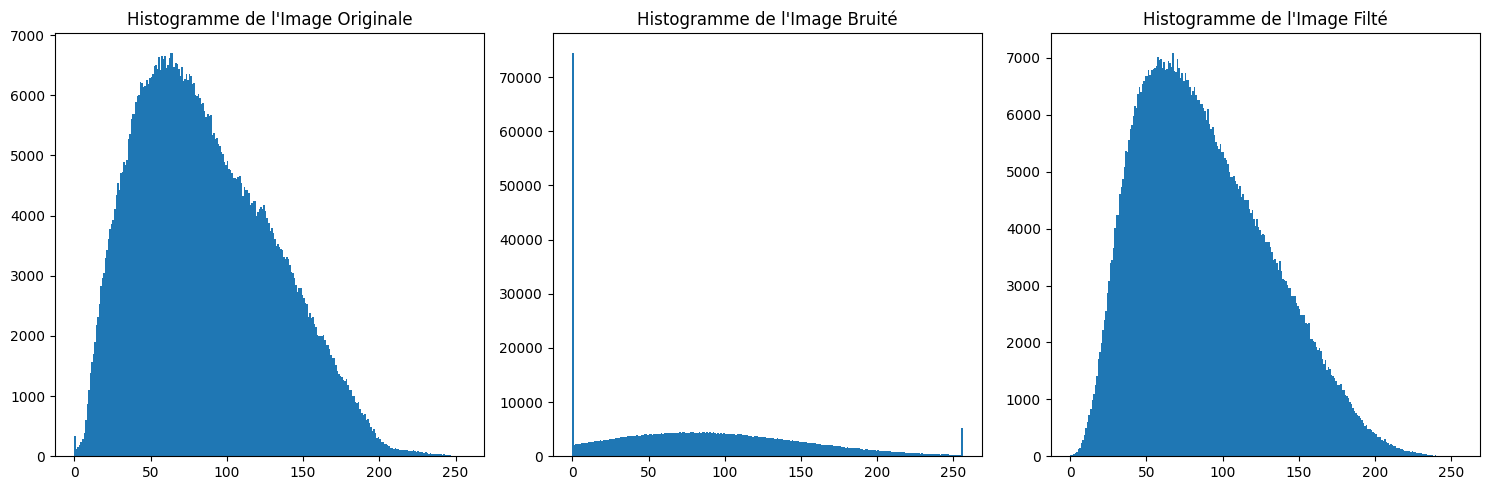

In [146]:
# Affichage les histogrammes pour chaque image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(image_rgb.ravel(), bins=256, range=[0, 256])
axes[0].set_title("Histogramme de l'Image Originale")
axes[1].hist(noisy_image.ravel(), bins=256, range=[0, 256])
axes[1].set_title("Histogramme de l'Image Bruité")
axes[2].hist(image_filtrée.ravel(), bins=256, range=[0, 256])
axes[2].set_title("Histogramme de l'Image Filté")
plt.tight_layout()
plt.show()

L'histogramme de l'image originale montre une répartition naturelle et équilibrée des intensités, reflétant une image claire et bien définie. En comparaison, l'histogramme de l'image bruitée est plus dispersé, avec une distribution étendue des pixels due au bruit Gaussien, créant un effet granuleux visible. Après le filtrage, l'histogramme de l'image filtrée devient plus concentré, montrant une réduction du bruit, mais avec une légère perte de détails par rapport à l'image originale.

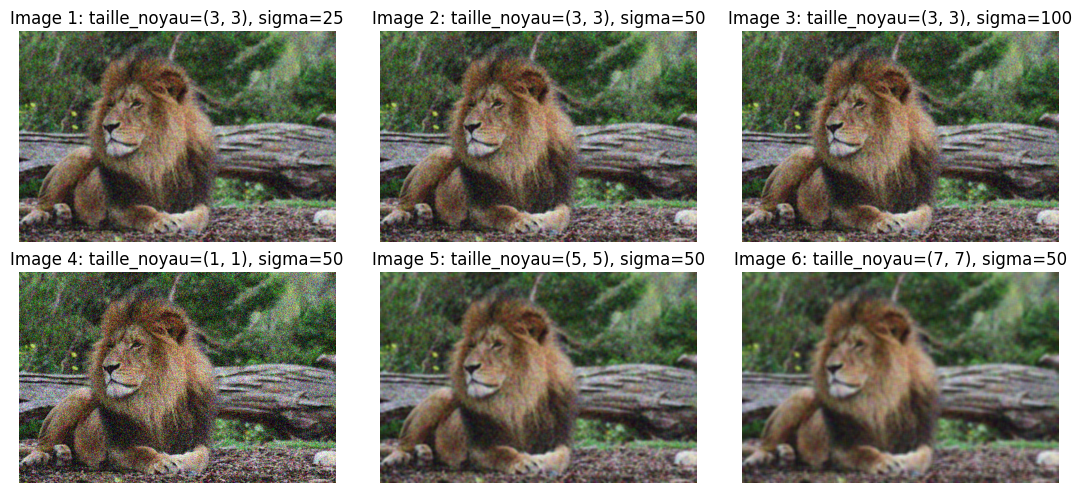

In [147]:
images_filtrées = []

# Application des filtres gaussiens avec différents paramètres
images_filtrées.append(cv2.GaussianBlur(noisy_image, (3, 3), 25))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (3, 3), 50))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (3, 3), 100))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (1, 1), 50))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (5, 5), 50))
images_filtrées.append(cv2.GaussianBlur(noisy_image, (7, 7), 50))

# Créer un subplot avec 2 lignes et 3 colonnes
fig, axes = plt.subplots(2, 3, figsize=(11, 5))

# Afficher chaque image filtrée dans les sous-graphiques
for i, ax in enumerate(axes.flat):
    ax.imshow(images_filtrées[i])
    ax.set_title(f"Image {i+1}: taille_noyau={(3,3) if i < 3 else (1,1) if i == 3 else (5,5) if i==4 else (7,7)}, sigma={ 25 if i==0 else 100 if i==2 else 50}")
    ax.axis("off")

plt.tight_layout()
plt.show()


L'application de différents filtres Gaussiens sur l'image bruitée montre des variations dans le lissage en fonction de la taille du noyau et du sigma. Les images avec un petit sigma et un noyau de taille (3,3) présentent un lissage modéré, préservant certains détails. En augmentant le sigma à 100, le lissage devient plus prononcé, effaçant davantage de bruit mais réduisant les détails fins. Les tailles de noyau comme (1,1) offrent peu de lissage, tandis que des noyaux plus grands, comme (5,5) ou (7,7), produisent un effet de lissage global plus marqué. Cette comparaison illustre comment ces paramètres influencent le compromis entre réduction du bruit et préservation des détails.

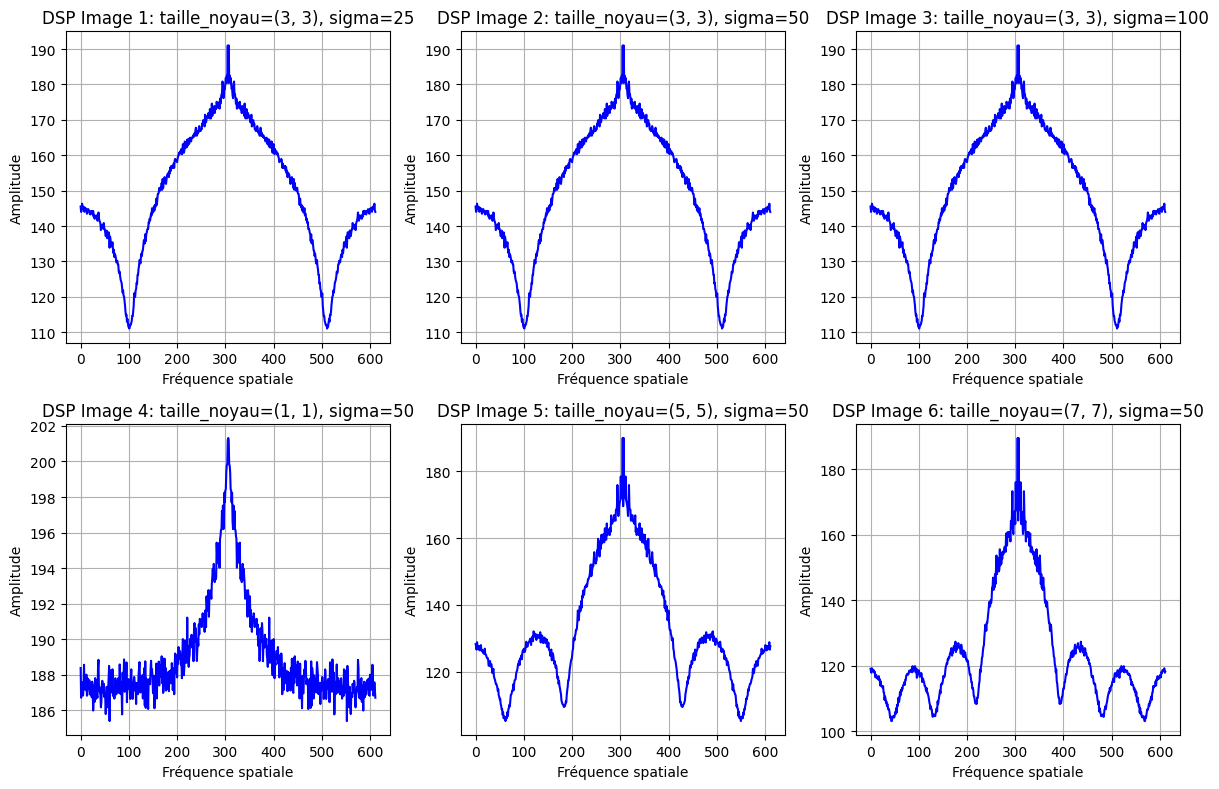

In [148]:
# Calcul des DSP pour chaque image filtrée
dsp_profiles_filtered = []

for img in images_filtrées:
    # Convertir en niveaux de gris
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Appliquer la Transformation de Fourier 2D
    f_transform = np.fft.fft2(gray_image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))

    # Calculer le profil de fréquence
    frequency_profile = np.mean(magnitude_spectrum, axis=0)
    dsp_profiles_filtered.append(frequency_profile)

# Affichage des DSP
fig, axes = plt.subplots(2, 3, figsize=(12, 8))


for i, ax in enumerate(axes.flat):
    ax.plot(dsp_profiles_filtered[i], color='blue')
    ax.set_title(f"DSP Image {i+1}: taille_noyau={(3,3) if i < 3 else (1,1) if i == 3 else (5,5) if i==4 else (7,7)}, sigma={ 25 if i==0 else 100 if i==2 else 50}")
    ax.set_xlabel("Fréquence spatiale")
    ax.set_ylabel("Amplitude")
    ax.grid()

plt.tight_layout()
plt.show()



Les résultats obtenus montrent clairement l’effet des différents paramètres des filtres gaussiens sur les fréquences spatiales des images bruitées. Pour les images avec une taille de noyau constante et des valeurs croissantes de sigma (Images 1 à 3), on observe une réduction progressive des hautes fréquences, reflétant un lissage plus prononcé. Lorsque la taille du noyau varie (Images 4 à 6), des noyaux plus grands (par exemple, (7,7)) amplifient le lissage, éliminant davantage les hautes fréquences et lissant les détails fins. En revanche, un noyau trop petit (comme (1,1)) laisse passer davantage de bruit, ce qui se traduit par une courbe DSP plus irrégulière. Ces observations montrent que le choix des paramètres du filtre gaussien influence directement la répartition des fréquences et permet d’ajuster le compromis entre réduction du bruit et préservation des détails.

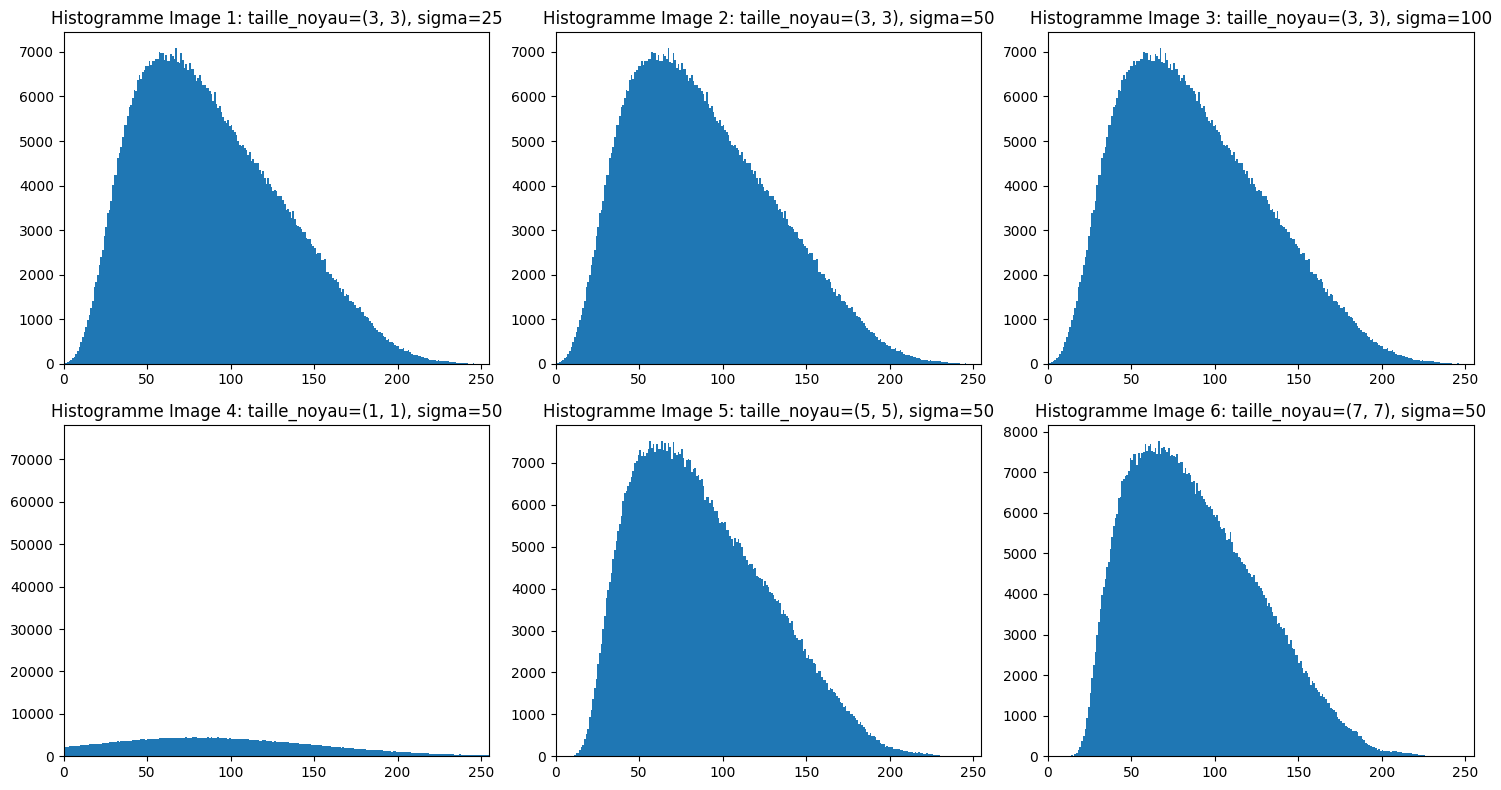

In [149]:
# Affichage les histogrammes pour chaque image
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, ax in enumerate(axes.flat):
    # Afficher l'histogramme de l'image
    ax.hist(images_filtrées[i].ravel(), bins=256, range=[0, 256])
    ax.set_title(f"Histogramme Image {i+1}: taille_noyau={(3,3) if i < 3 else (1,1) if i == 3 else (5,5) if i==4 else (7,7)}, sigma={ 25 if i==0 else 100 if i==2 else 50}")
    ax.set_xlim(0, 255)

plt.tight_layout()
plt.show()

Les histogrammes des images filtrées montrent l'évolution de la répartition des intensités en fonction des paramètres de filtrage. Avec un noyau de taille (3,3) et un sigma croissant (25 à 100), la répartition devient plus homogène, indiquant un lissage progressif. Un petit noyau (1,1) et un sigma de 50 préservent des variations d'intensité, avec moins de réduction de bruit. Les noyaux plus grands, (5,5) et (7,7), montrent une répartition encore plus uniforme, marquant une forte atténuation du bruit. Ces variations d'histogrammes soulignent comment les paramètres influencent le compromis entre le bruit résiduel et le lissage global.

Le filtre gaussien est un outil puissant, mais il est limité par son sensibilité aux paramètres, son inefficacité face à certains types de bruit, et son potentiel à altérer les détails de l'image. Pour surmonter ces contraintes, il est parfois préférable d'utiliser des méthodes avancées comme les filtres adaptatifs ou les filtres spécifiques au type de bruit (médian, Wiener, etc.).

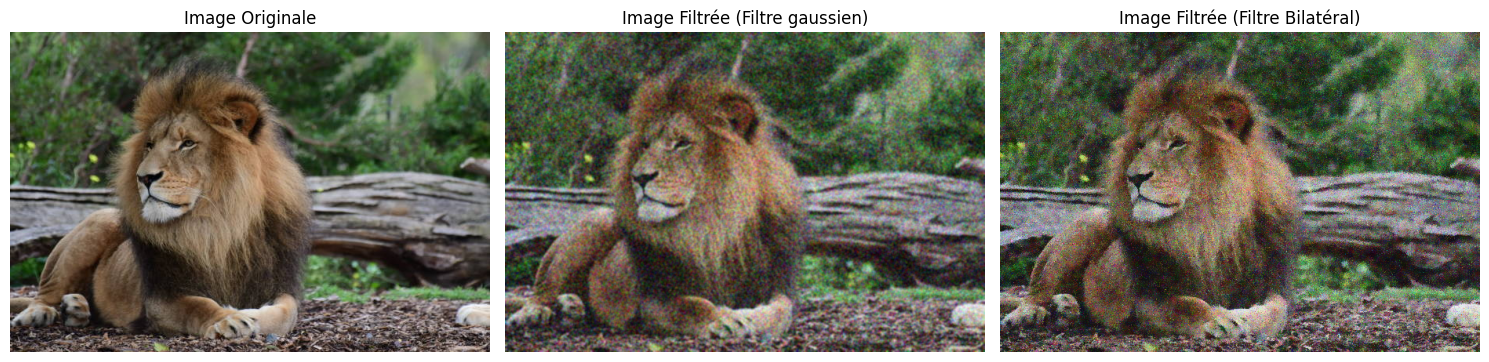

In [150]:
noisy_image=Bruit_Gaussien(image_rgb, mean=0, sigma=50)
sigma=50
taille_noyau=(3,3)
image_filtrée_gaussien = cv2.GaussianBlur(noisy_image, taille_noyau, sigma)
# Appliquer le filtre bilatéral sur l'image bruitée
image_bilateral = cv2.bilateralFilter(noisy_image, d=9, sigmaColor=75, sigmaSpace=75)

# Afficher l'image originale, bruitée et filtrée
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Image originale
axes[0].imshow(image_rgb)
axes[0].set_title("Image Originale")
axes[0].axis("off")

# Image filtrée avec le filtre gaussien
axes[1].imshow(image_filtrée_gaussien )
axes[1].set_title("Image Filtrée (Filtre gaussien)")
axes[1].axis("off")

# Image filtrée avec le filtre bilatéral
axes[2].imshow(image_bilateral)
axes[2].set_title("Image Filtrée (Filtre Bilatéral)")
axes[2].axis("off")

plt.tight_layout()
plt.show()


Le filtre bilatéral est une amélioration significative par rapport au filtre gaussien lorsqu'il s'agit de préserver les contours tout en supprimant le bruit.

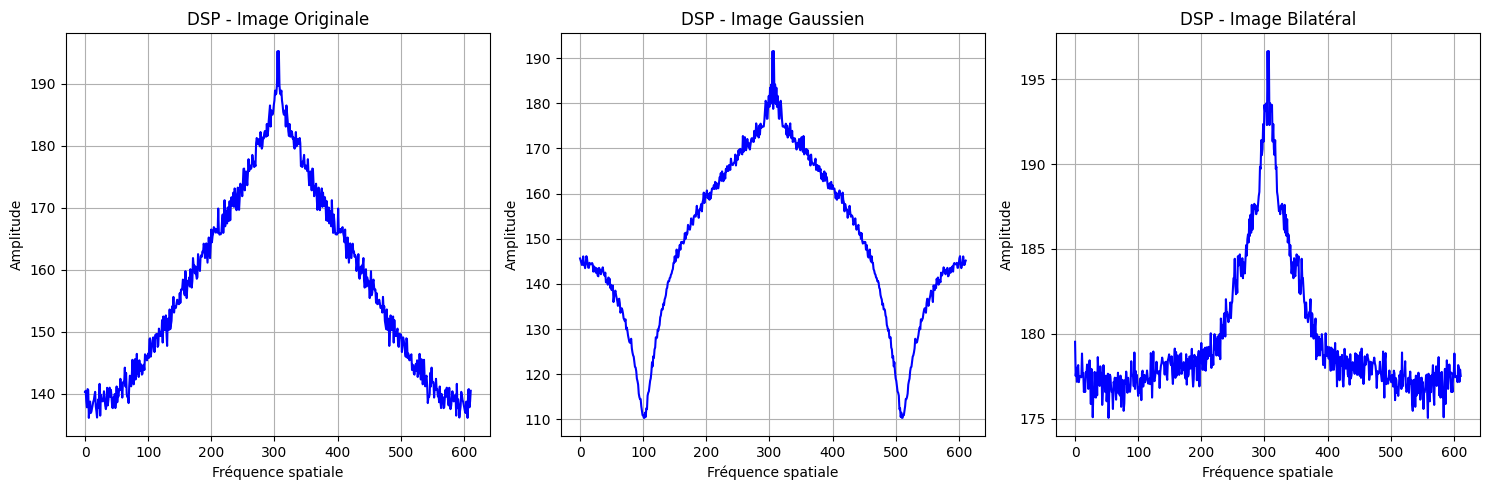

In [151]:
# Calcul des DSP pour chaque image (originale, filtrée gaussien, filtrée bilatéral)
images = [image_rgb, image_filtrée_gaussien, image_bilateral]
dsp_profiles = []

for img in images:
    # Convertir en niveaux de gris
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Appliquer la Transformation de Fourier 2D
    f_transform = np.fft.fft2(gray_image)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))

    # Calculer le profil de fréquence
    frequency_profile = np.mean(magnitude_spectrum, axis=0)
    dsp_profiles.append(frequency_profile)

# Affichage des DSP sur une seule figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

titles = ["DSP - Image Originale", "DSP - Image Gaussien", "DSP - Image Bilatéral"]

for i, ax in enumerate(axes):
    ax.plot(dsp_profiles[i], color='blue')
    ax.set_title(titles[i])
    ax.set_xlabel("Fréquence spatiale")
    ax.set_ylabel("Amplitude")
    ax.grid()

plt.tight_layout()
plt.show()


 Pour l'image originale, la courbe DSP met en évidence une concentration d'énergie dans les basses fréquences, typique des images structurées sans bruit important. Avec le filtre gaussien, on observe une réduction significative des hautes fréquences, traduisant une bonne suppression du bruit, mais au prix d'un lissage global qui affecte également les basses fréquences, entraînant une perte de détails et de contours. En revanche, le filtre bilatéral réussit à réduire le bruit tout en préservant les basses fréquences, ce qui permet de conserver les contours et les structures importantes de l'image. Cela illustre que le filtre bilatéral est plus efficace pour les applications nécessitant un compromis entre suppression du bruit et préservation des détails visuels.

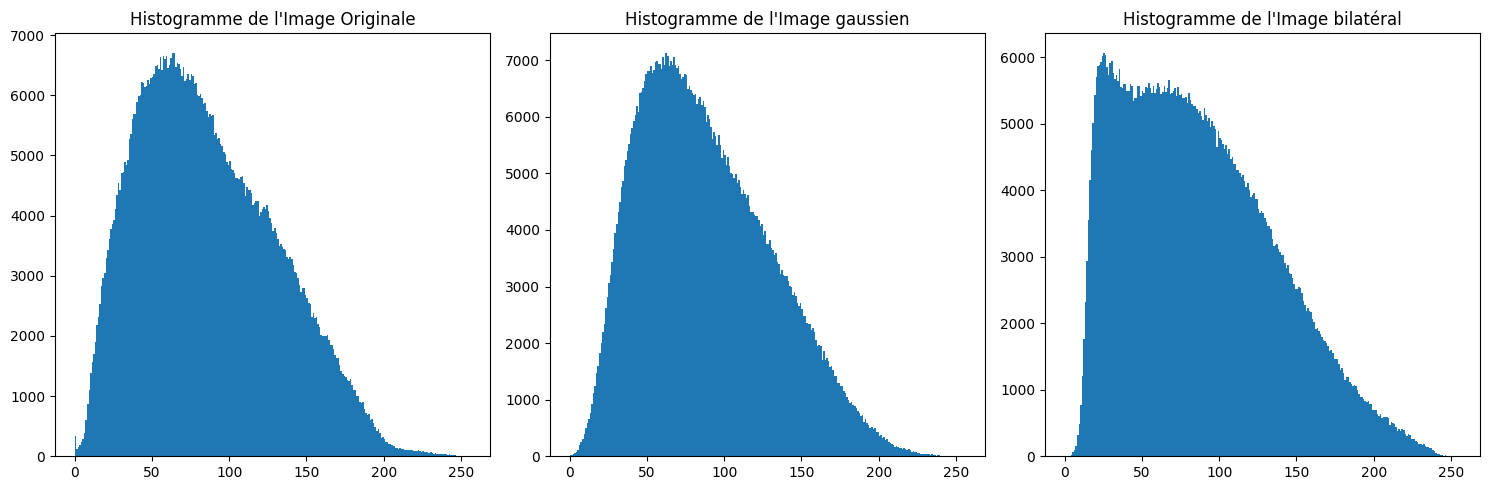

In [152]:
# Affichage les histogrammes pour chaque image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(image_rgb.ravel(), bins=256, range=[0, 256])
axes[0].set_title("Histogramme de l'Image Originale")
axes[1].hist(image_filtrée_gaussien.ravel(), bins=256, range=[0, 256])
axes[1].set_title("Histogramme de l'Image gaussien")
axes[2].hist(image_bilateral.ravel(), bins=256, range=[0, 256])
axes[2].set_title("Histogramme de l'Image bilatéral")
plt.tight_layout()
plt.show()

Les histogrammes montrent que l'image originale possède une répartition naturelle des intensités reflétant ses structures globales. Après l'application du filtre gaussien, l'histogramme se resserre autour des valeurs moyennes, indiquant un lissage global et une réduction du bruit, mais avec une perte de contraste. En revanche, l'histogramme de l'image filtrée bilatérale conserve une meilleure diversité des intensités, montrant une préservation des contours et des détails tout en réduisant le bruit. Cela démontre l'efficacité du filtre bilatéral pour un traitement plus précis et équilibré.